In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge 
from sklearn.svm import SVR


import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [2]:
df=pd.read_csv('abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [5]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
df['age']=df['Rings']+1.5

In [10]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [11]:
df.drop('Rings',axis=1,inplace=True)

In [12]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [13]:
df.shape

(4177, 9)

In [14]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [15]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,13.5


In [16]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

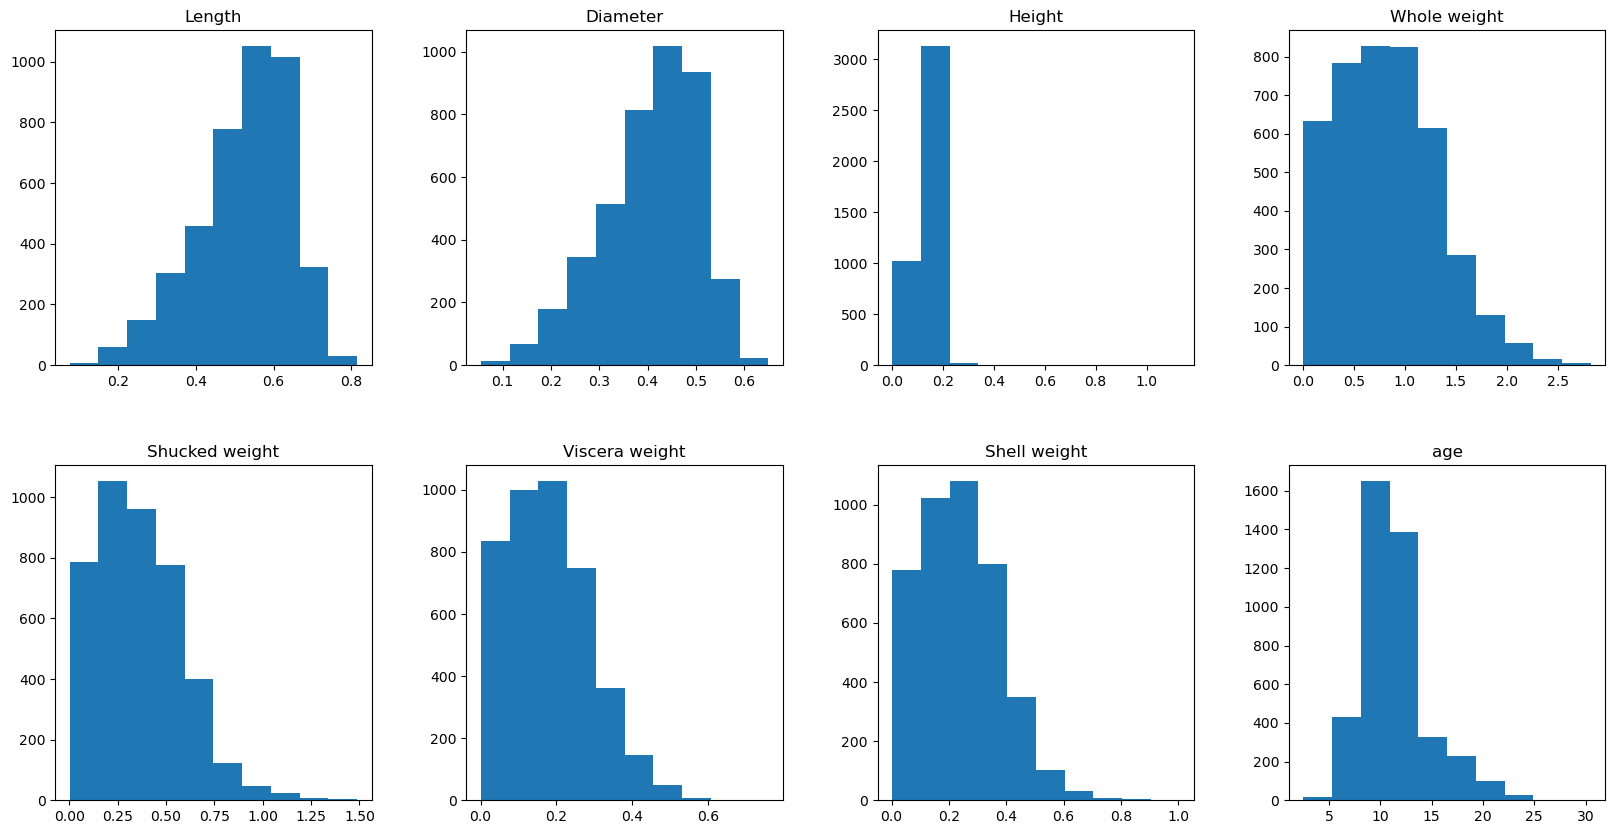

In [17]:
df.hist(figsize=(20,10),grid=False,layout=(2,4),bins=10)

In [18]:
num_col=df.select_dtypes(include=[np.number]).columns
cat_col=df.select_dtypes(include=[object]).columns

In [19]:
num_col

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [20]:
cat_col

Index(['Sex'], dtype='object')

In [21]:
df[num_col]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [22]:
skew_values=skew(df[num_col],nan_policy='omit')

In [23]:
skew_values

array([-0.63964346, -0.60897935,  3.12769368,  0.53076787,  0.71883966,
        0.59163959,  0.62070382,  1.11370177])

In [24]:
dummy=pd.concat([pd.DataFrame(list(num_col),columns=['features']),
                 pd.DataFrame(list(skew_values),columns=['skewness degree'])],axis=1)


In [25]:
dummy.sort_values(by='skewness degree',ascending=False)

,features,skewness degree
2,Height,3.127694
7,age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


<AxesSubplot:xlabel='Sex', ylabel='count'>

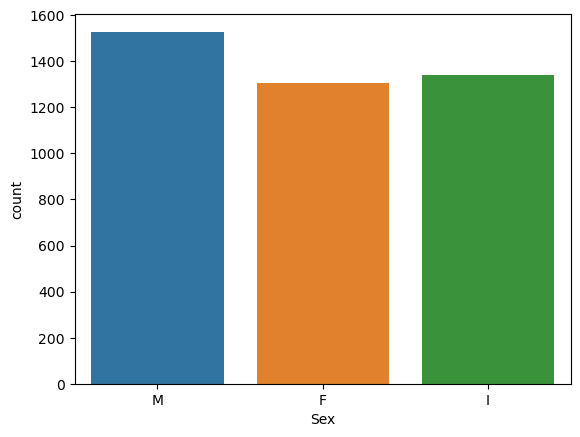

In [26]:
num_col=df.select_dtypes(include=[np.number]).columns
cat_col=df.select_dtypes(include=[object]).columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='age'>

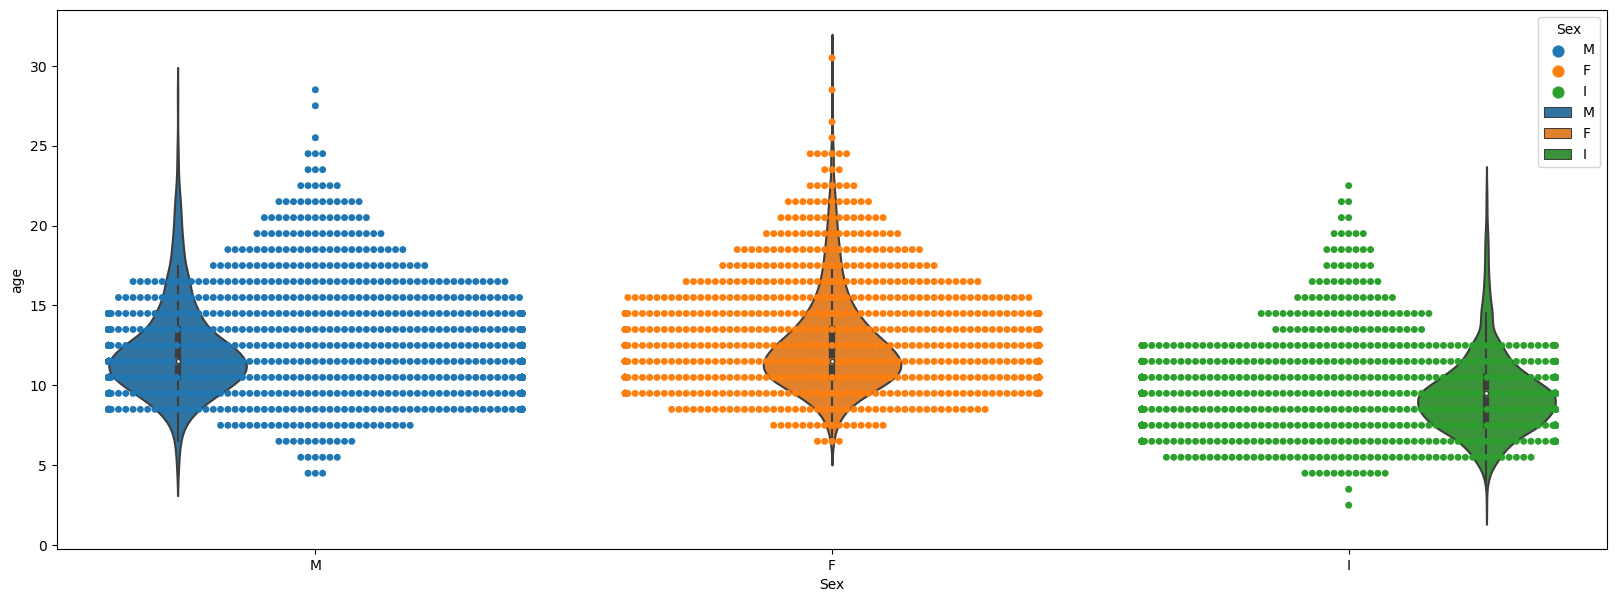

In [27]:
plt.figure(figsize=(20,7))
sns.swarmplot(x='Sex',y='age',data=df,hue='Sex')
sns.violinplot(x='Sex',y='age',data=df,hue='Sex')


In [28]:
df.groupby('Sex')[num_col].mean().sort_values('age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


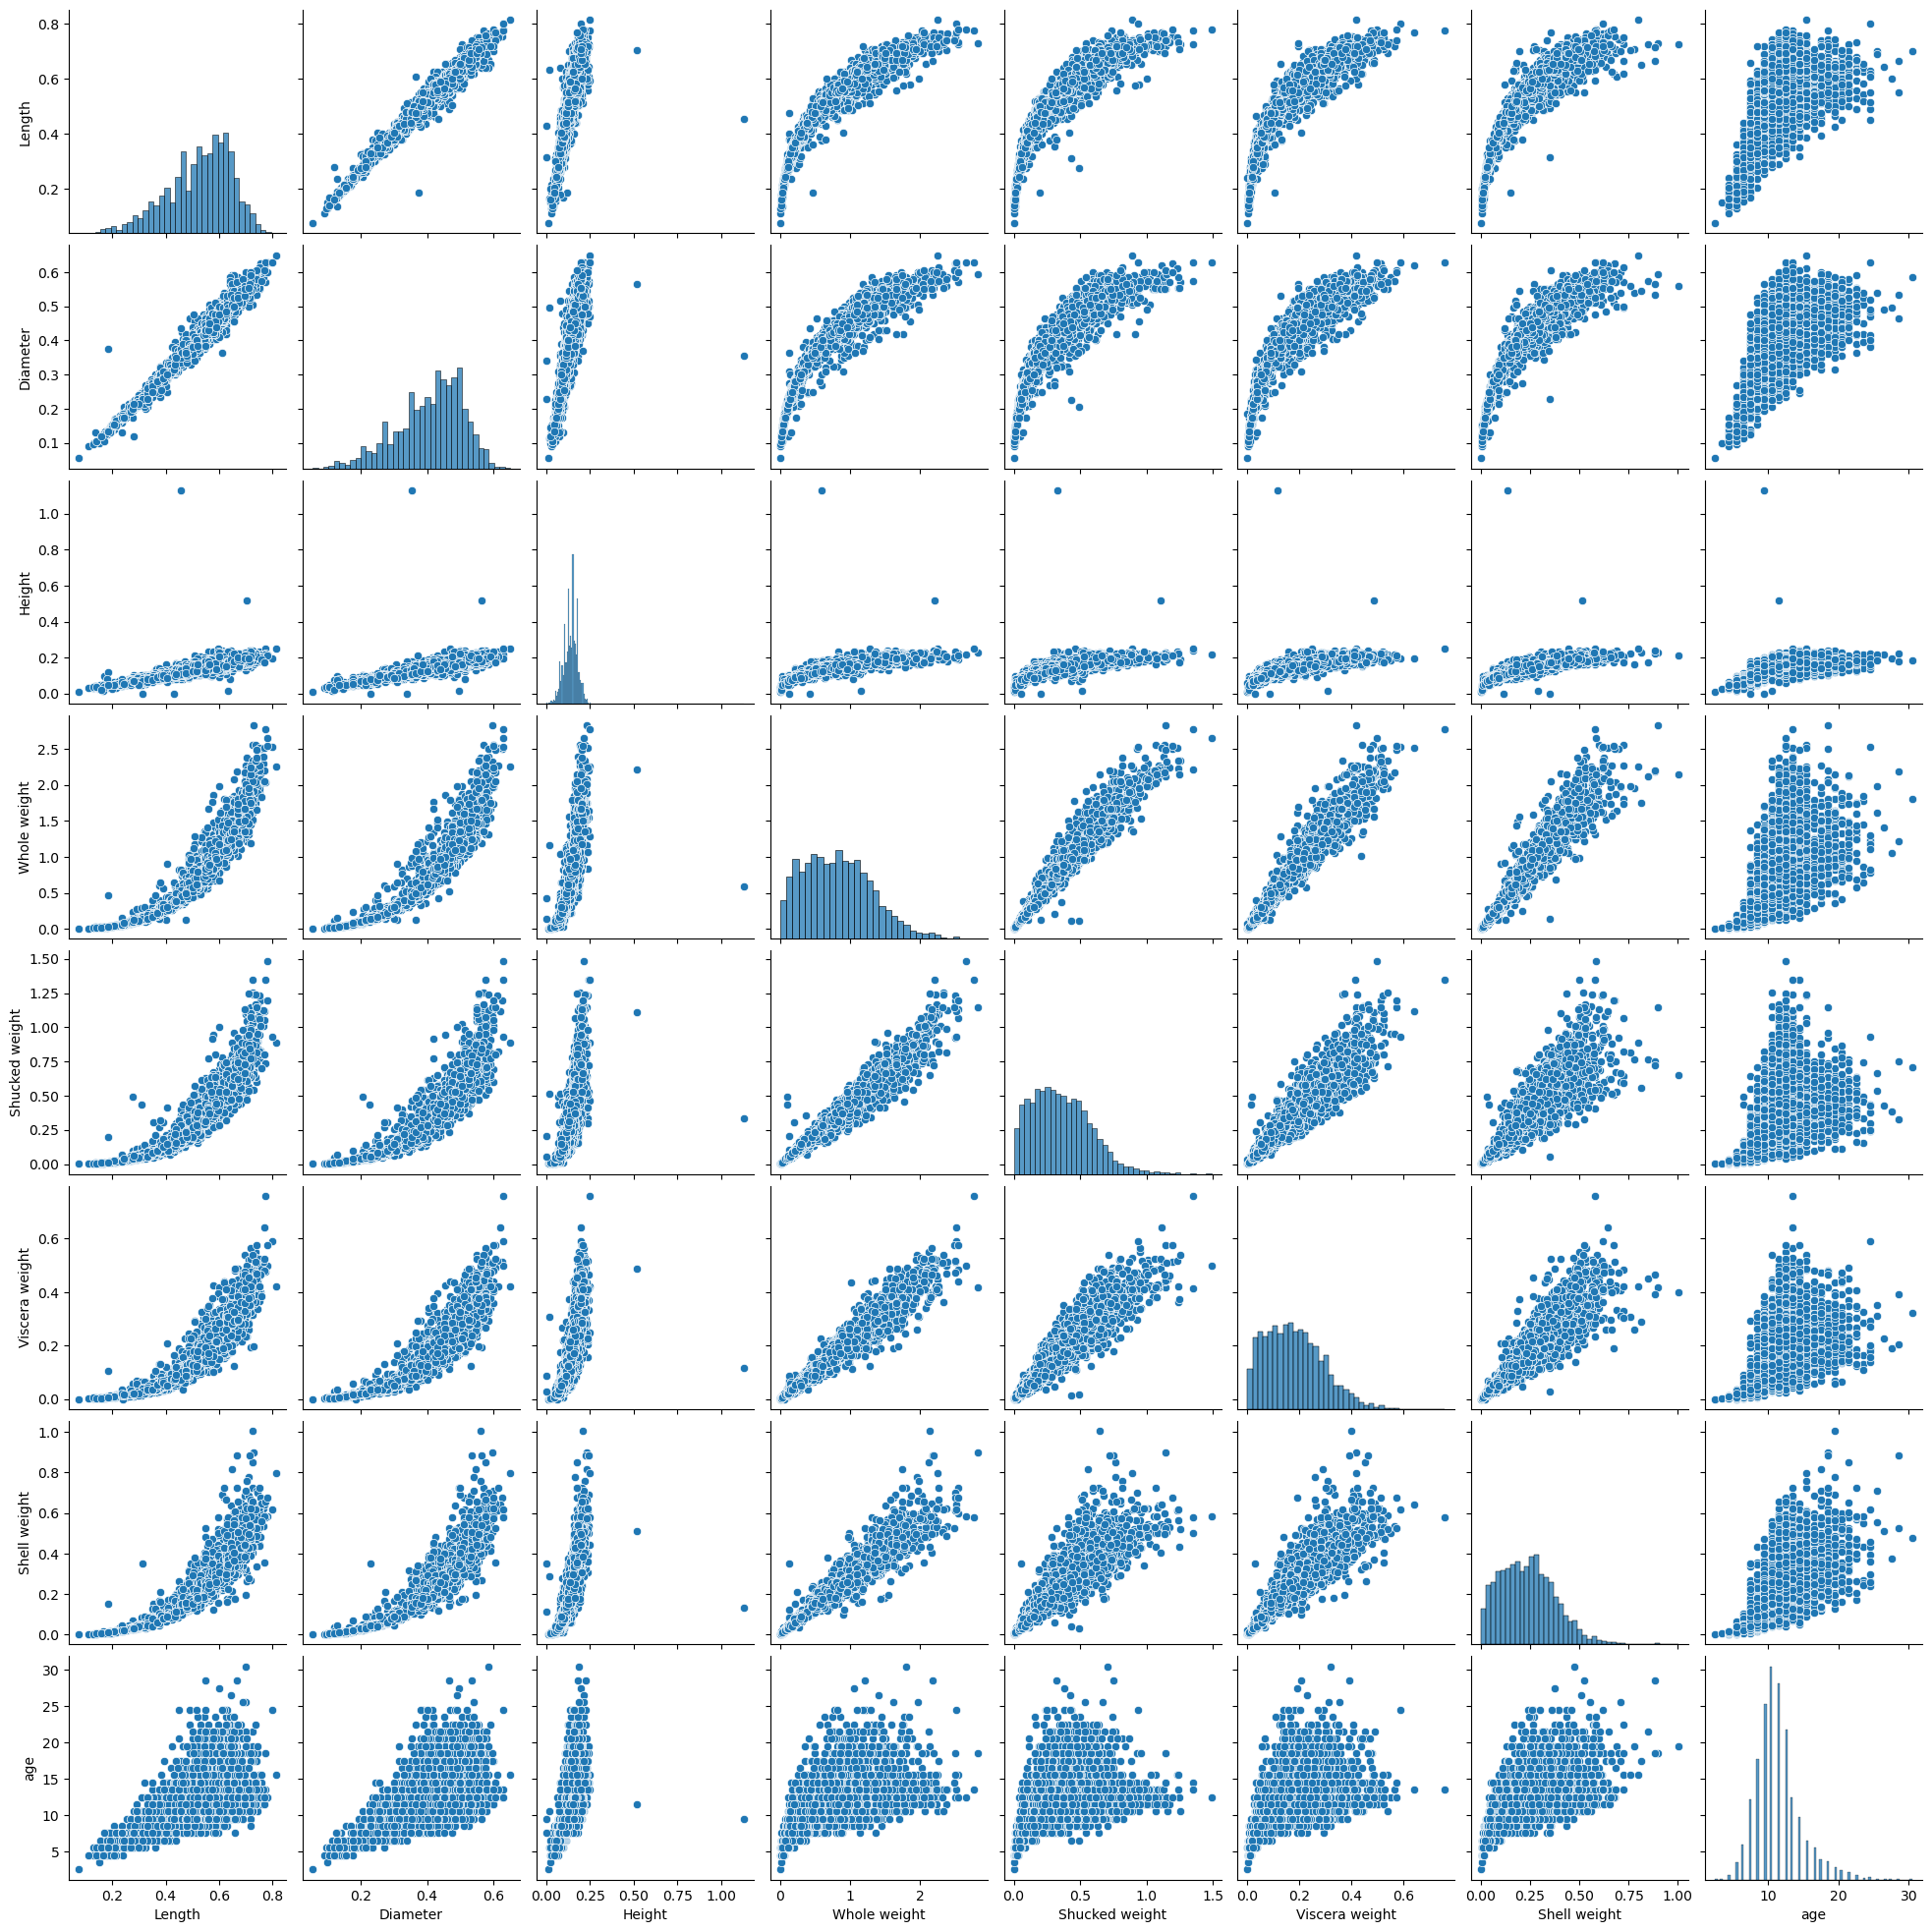

In [29]:
sns.pairplot(df)

Text(0.5, 1.0, 'correlation heatmap')

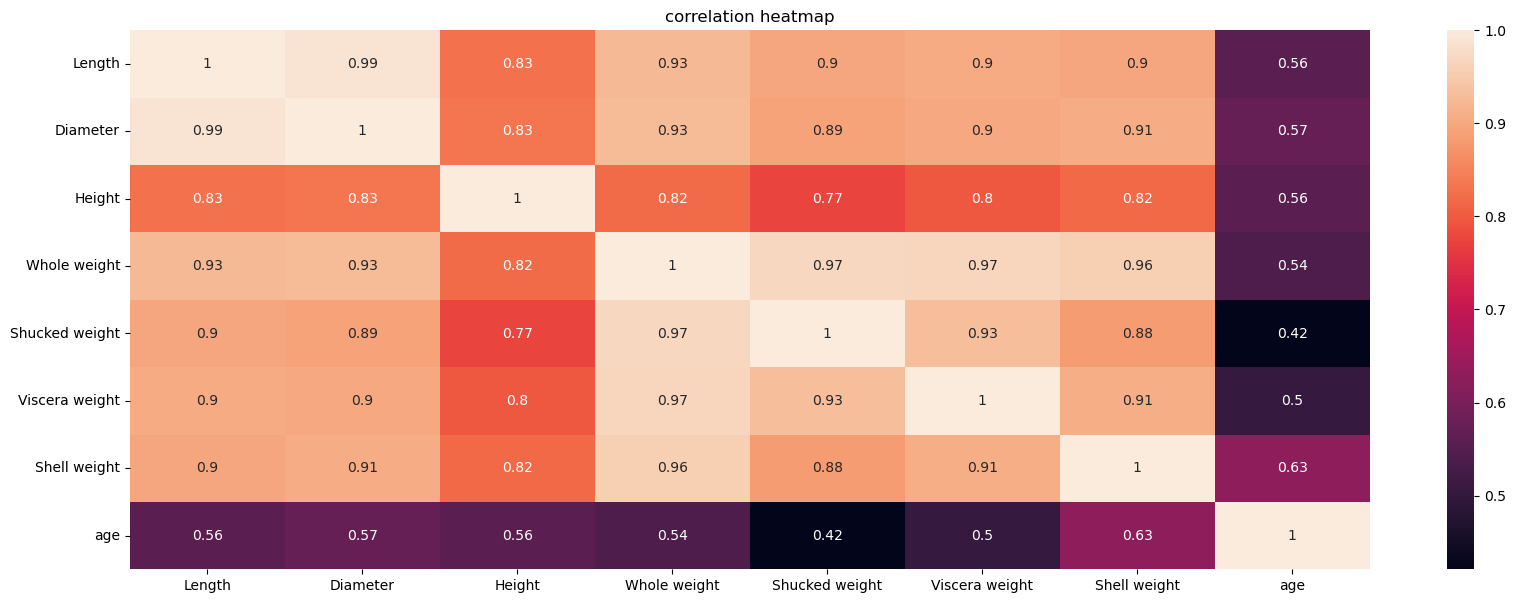

In [30]:
plt.figure(figsize=(20,7))
sns.heatmap(df[num_col].corr(),annot=True)
plt.title('correlation heatmap')



# outlier handling



In [31]:
data=df.copy()
df=pd.get_dummies(df)

<AxesSubplot:>

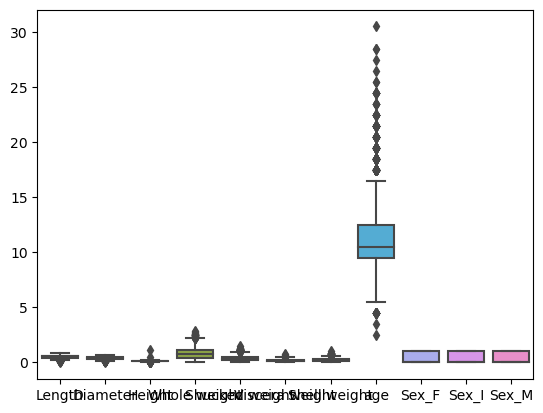

In [32]:
sns.boxplot(data=df)

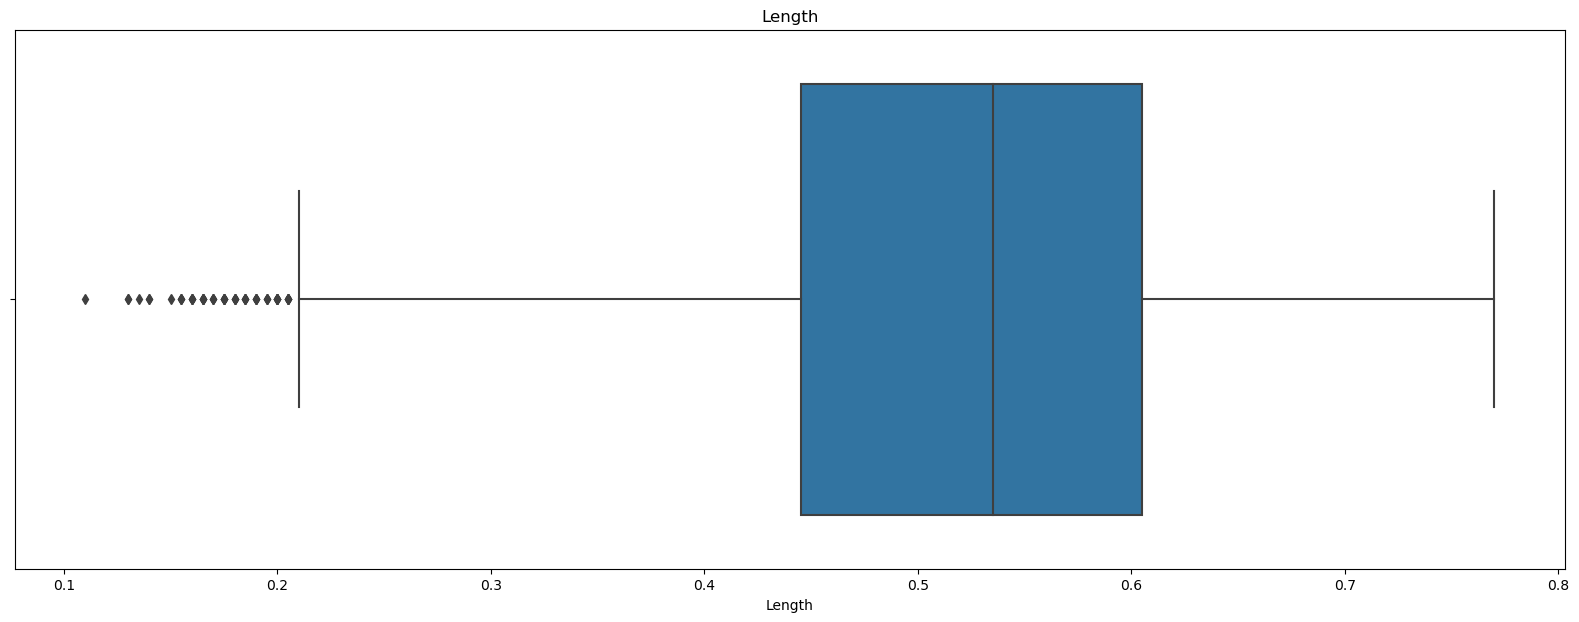

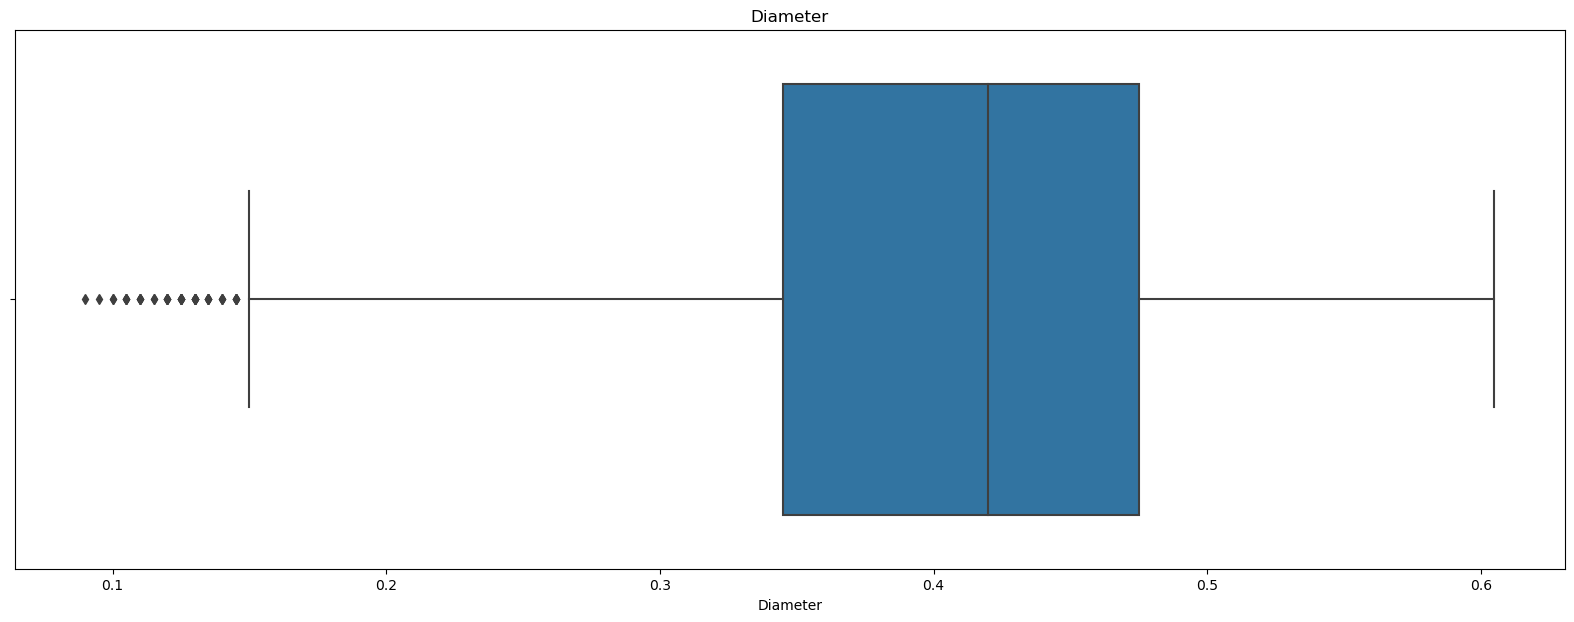

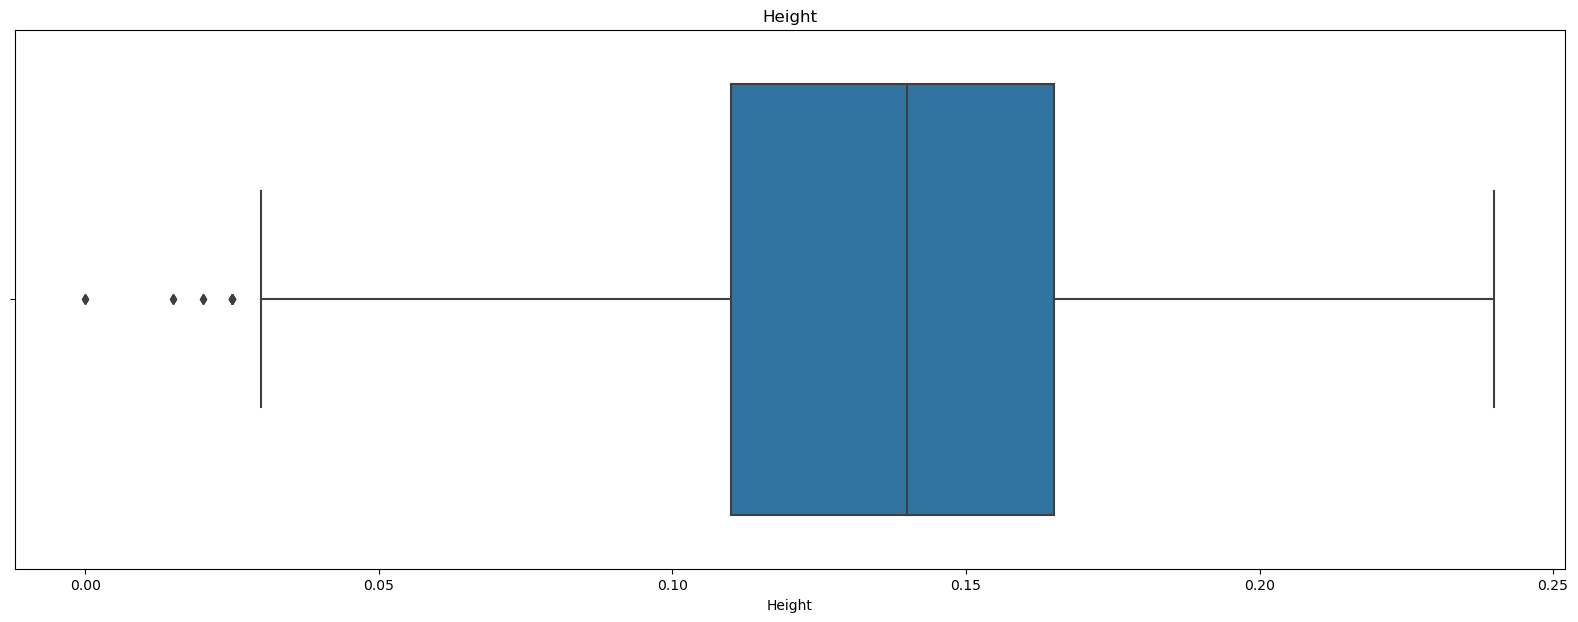

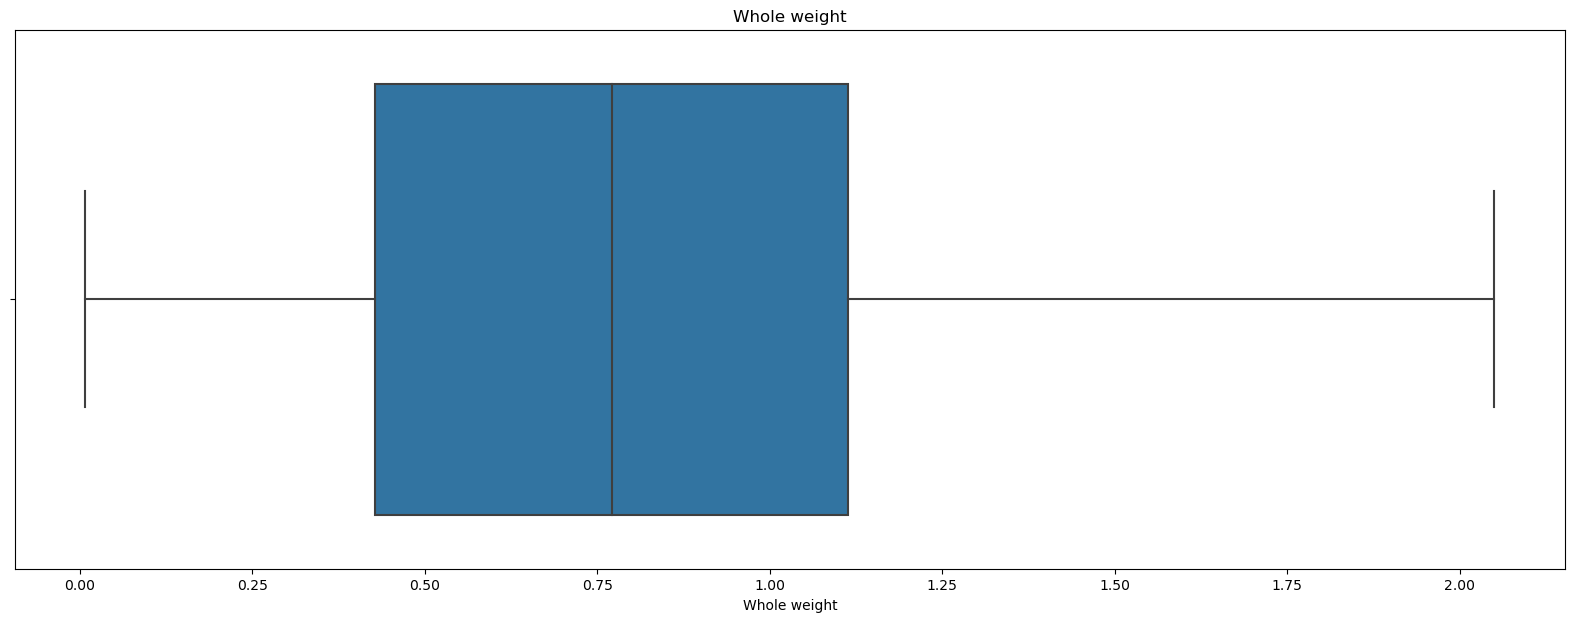

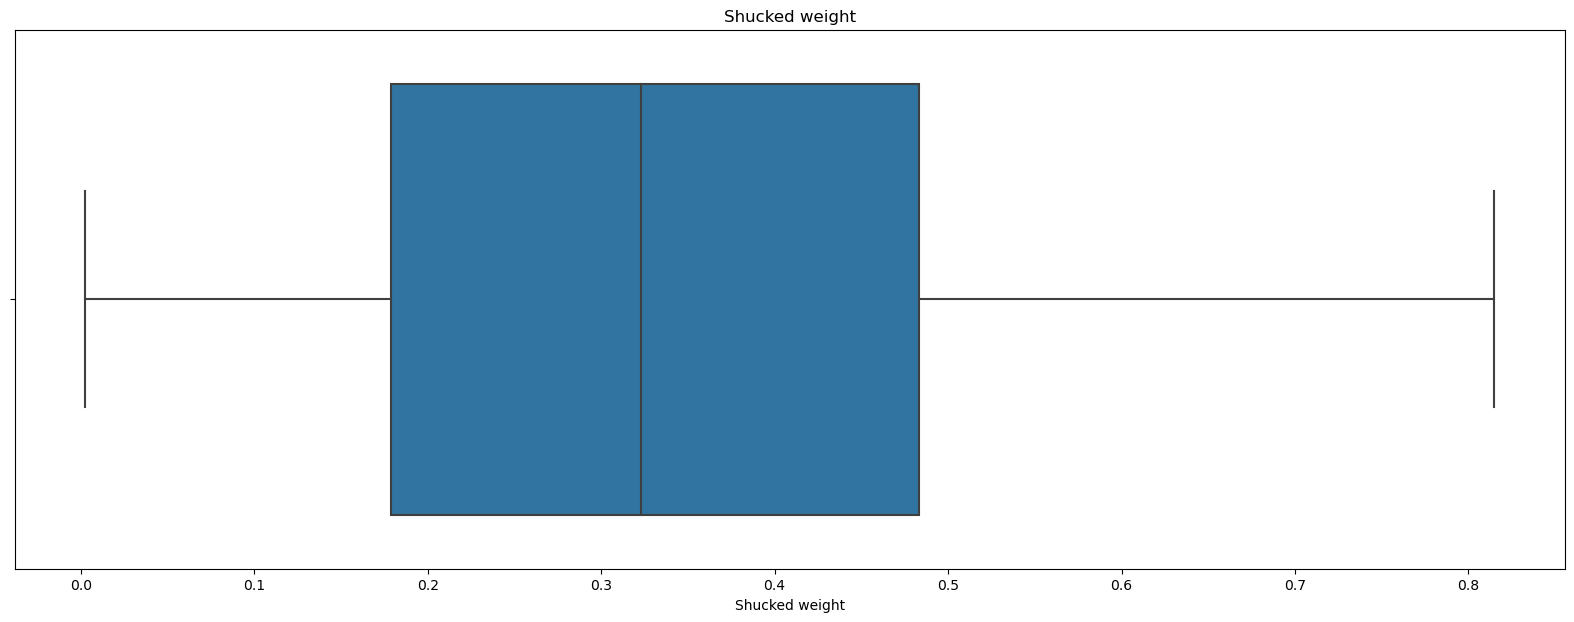

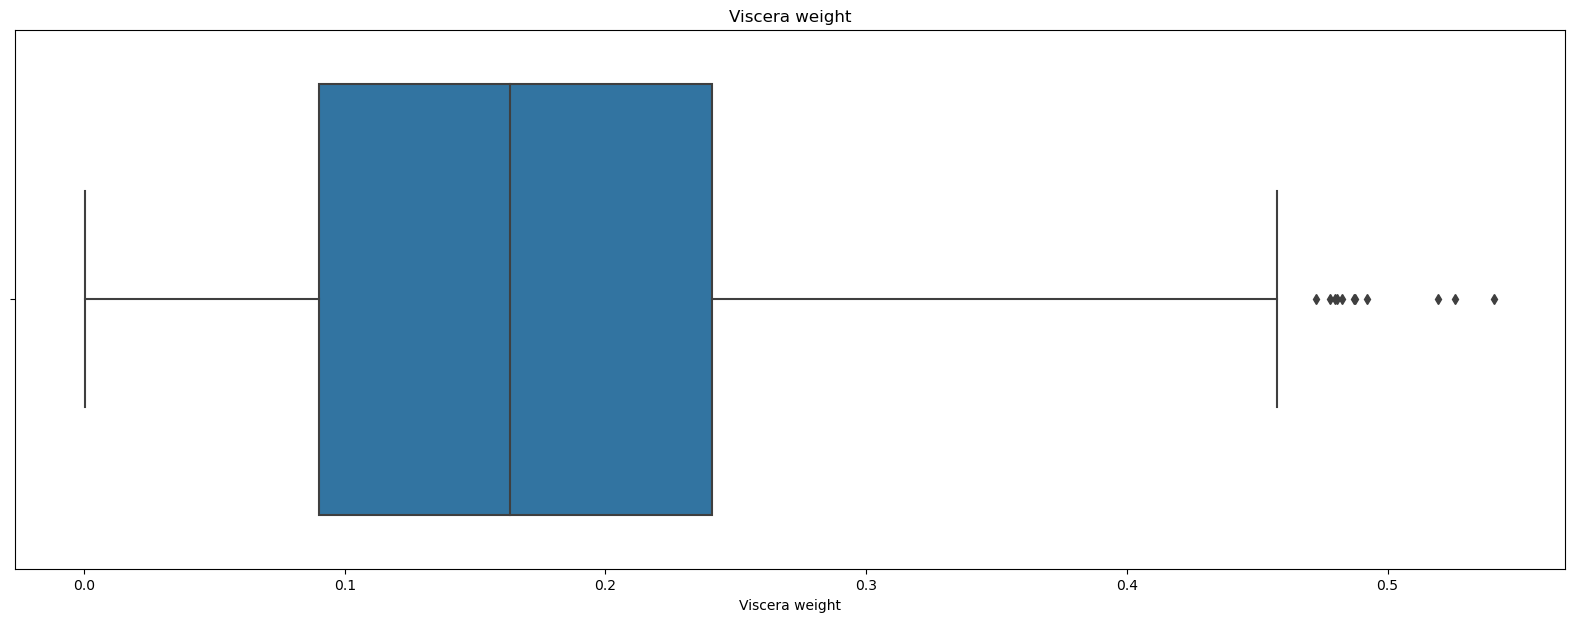

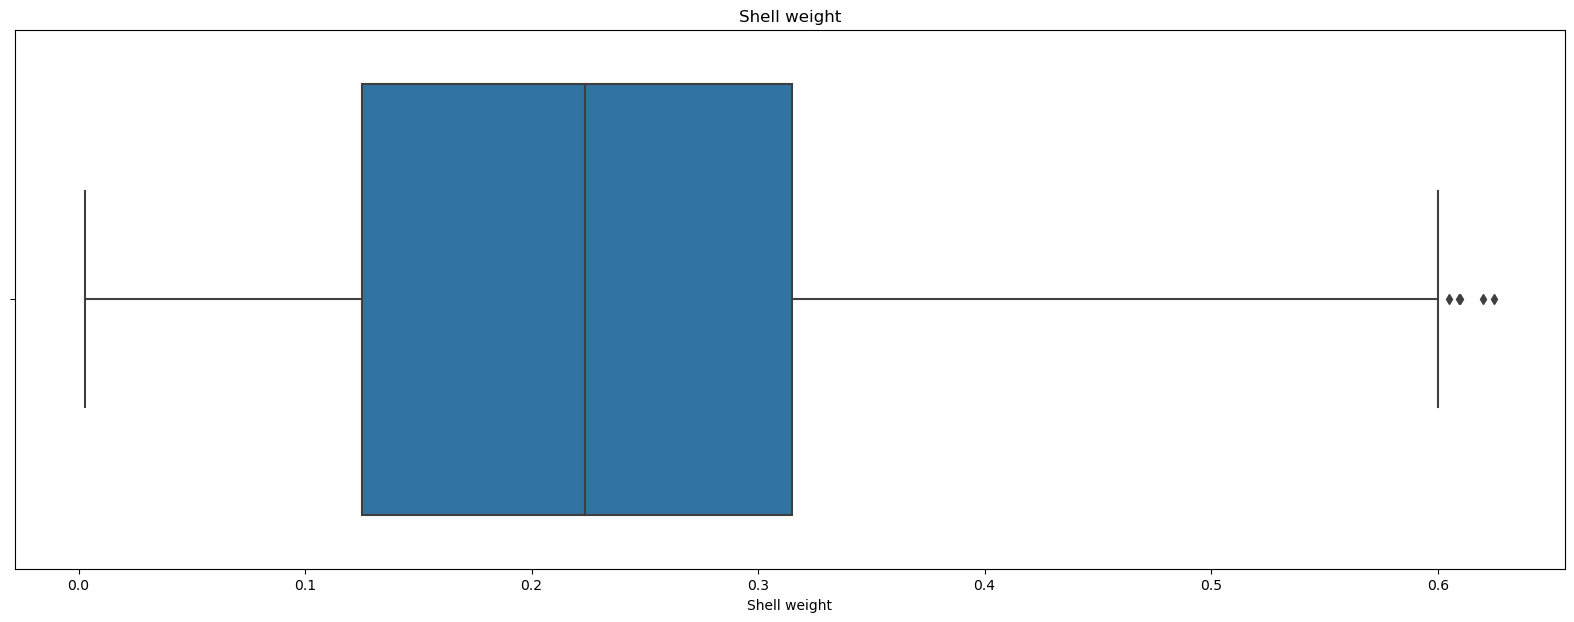

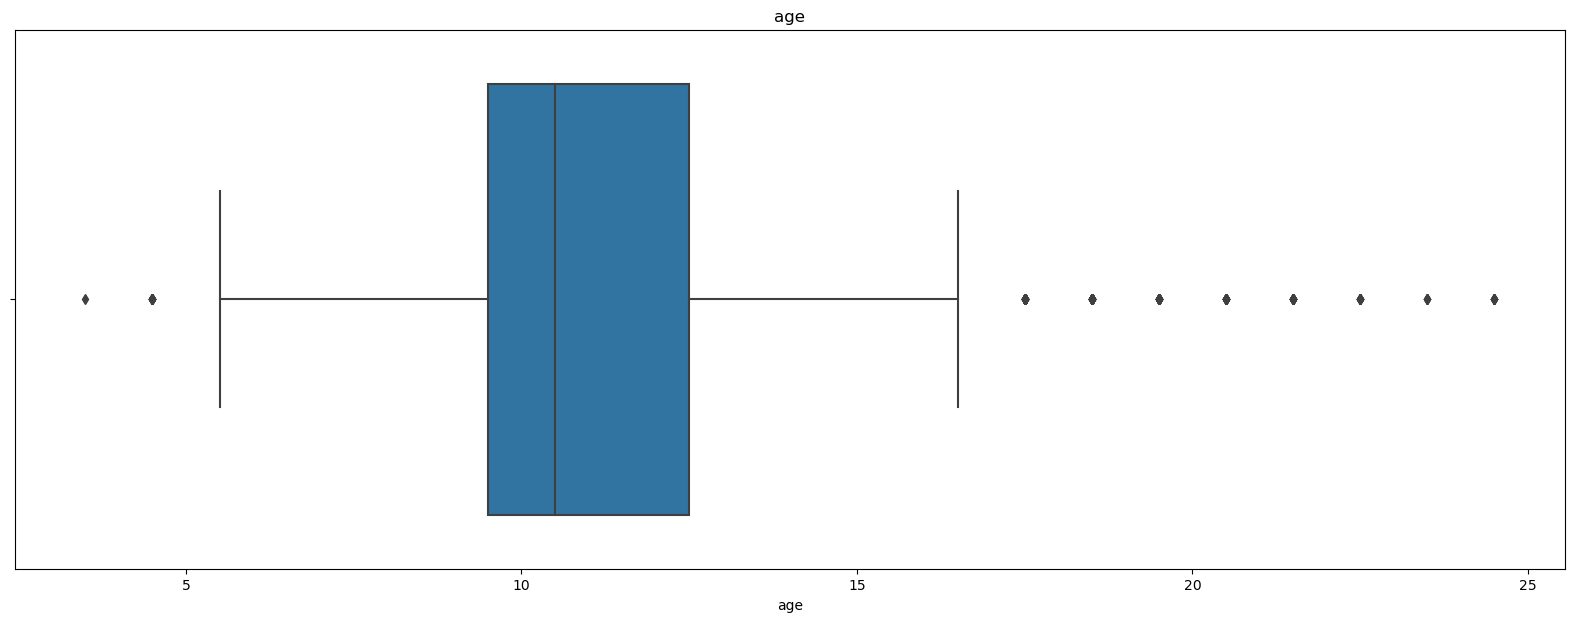

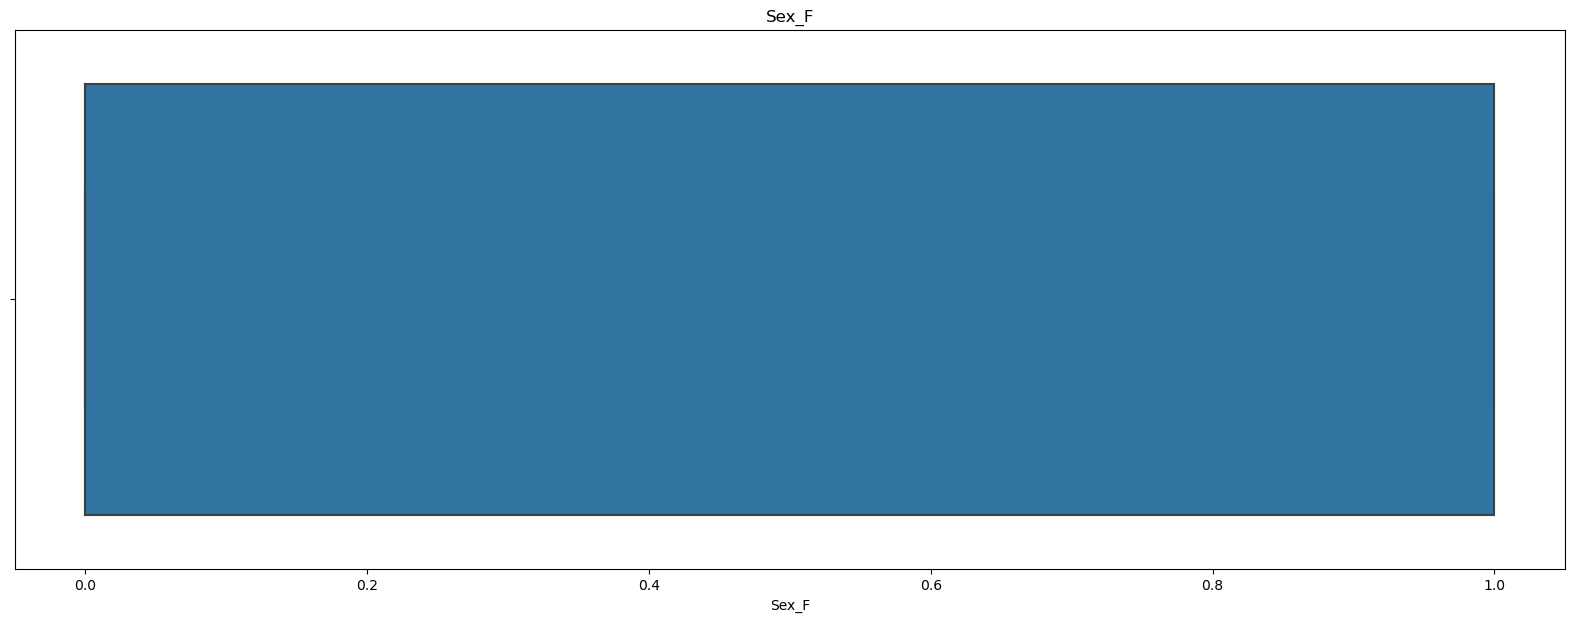

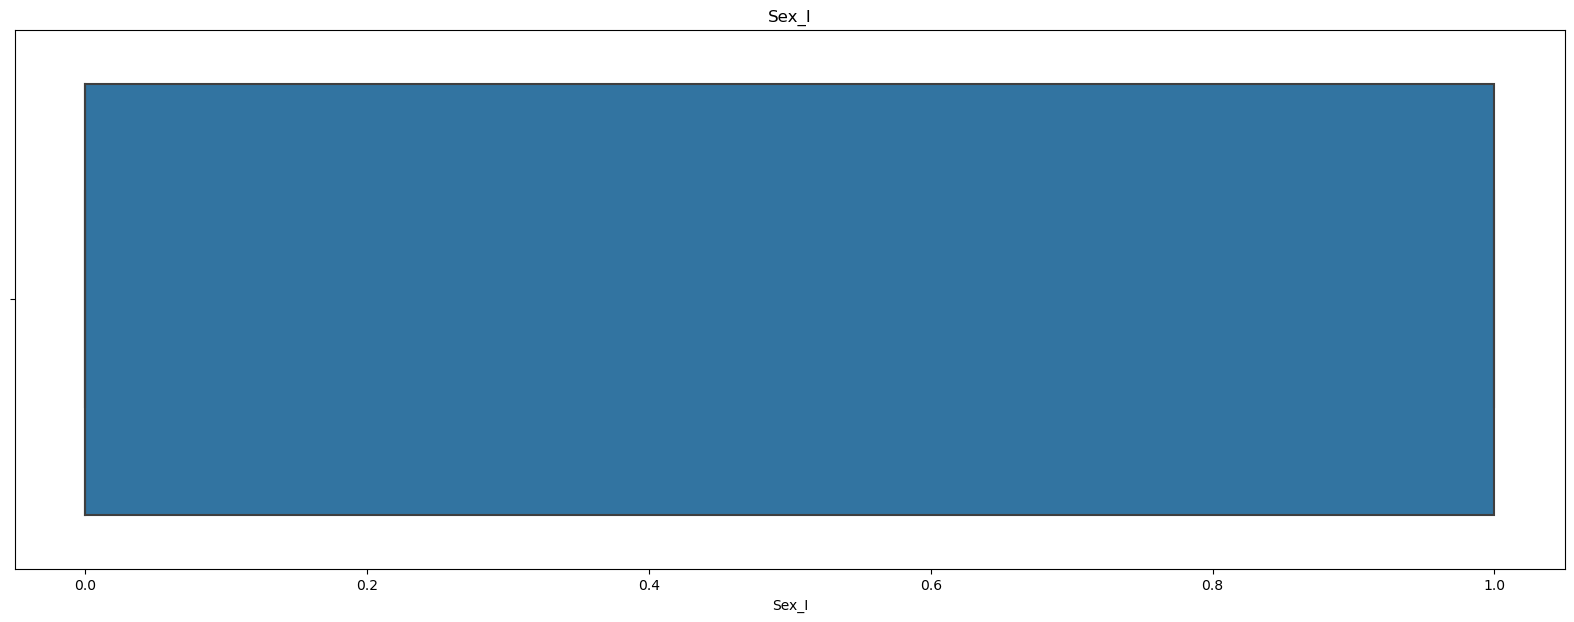

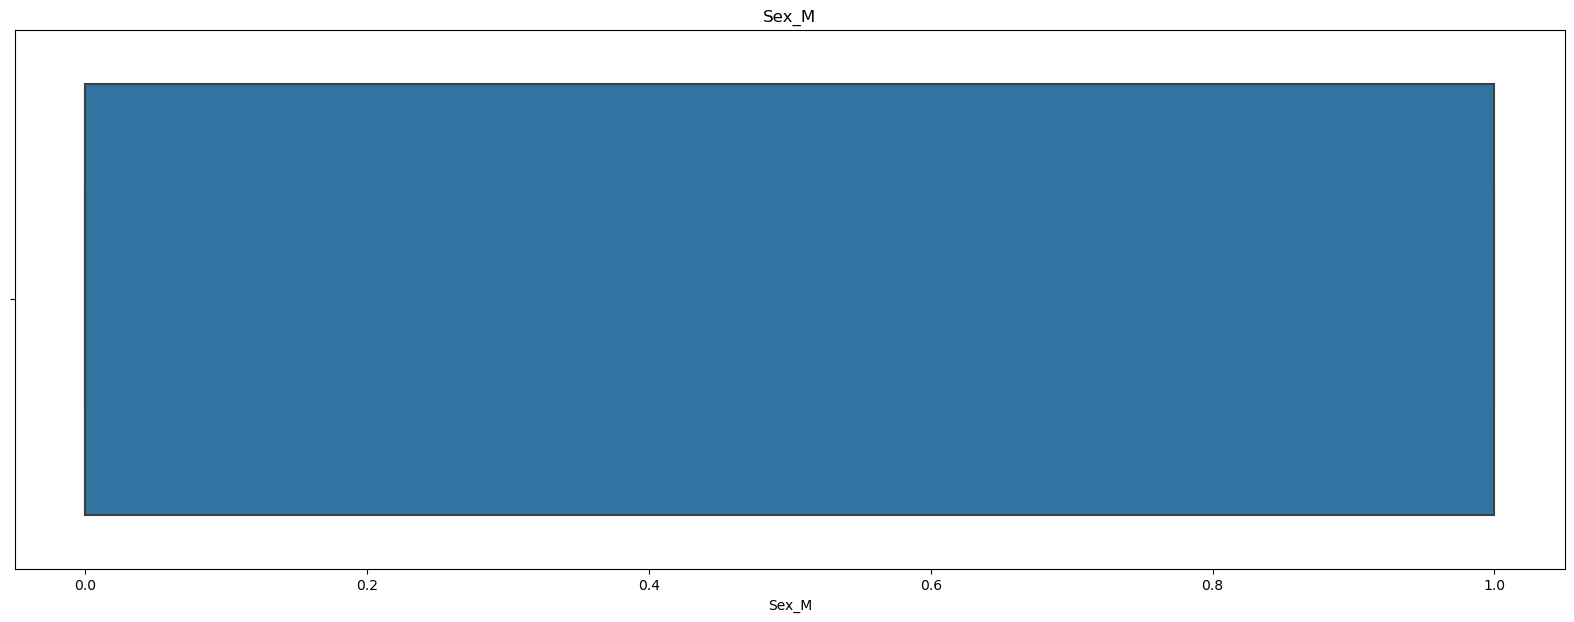

In [53]:
for x in df.columns:
    plt.figure(figsize=(20,7))
    sns.boxplot(data=df,x=x)
    plt.title(x)

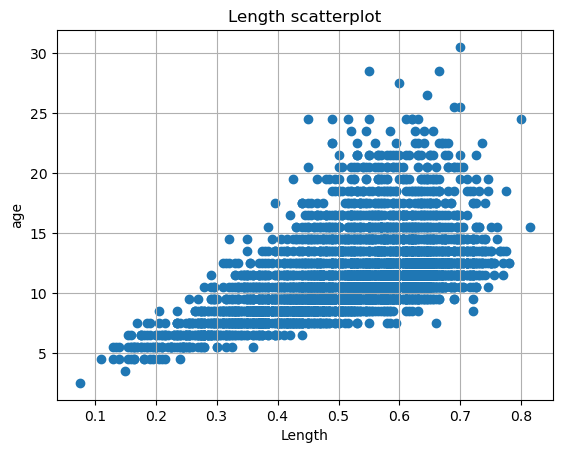

In [34]:
var='Length'
plt.scatter(x=df[var],y=df['age'])
plt.xlabel(var)
plt.ylabel('age')
plt.title(var+' scatterplot')
plt.grid(True)
plt.show()

In [35]:
df.drop(df[(df['Length']<0.1) & (df['age']<5)].index,inplace=True)
df.drop(df[(df['Length']<0.8) & (df['age']>25)].index,inplace=True)
df.drop(df[(df['Length']>=0.8) & (df['age']<25)].index,inplace=True)

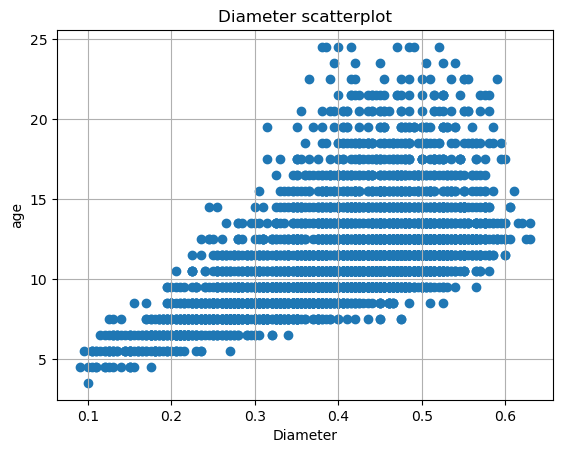

In [36]:
var='Diameter'
plt.scatter(x=df[var],y=df['age'])
plt.xlabel(var)
plt.ylabel('age')
plt.title(var+' scatterplot')
plt.grid(True)
plt.show()

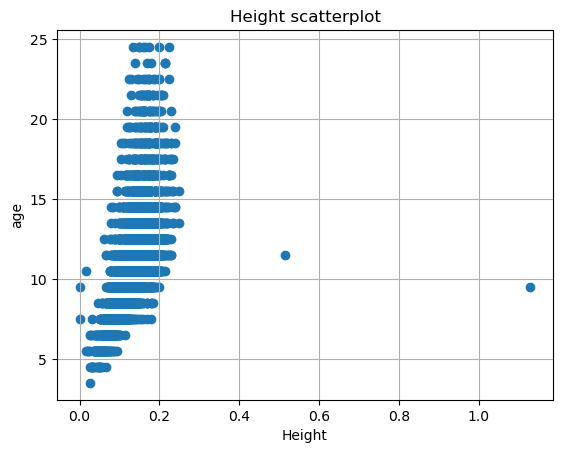

In [37]:
var='Height'
plt.scatter(x=df[var],y=df['age'])
plt.xlabel(var)
plt.ylabel('age')
plt.title(var+' scatterplot')
plt.grid(True)
plt.show()

In [38]:
df.drop(df[(df['Height']>0.24) ].index,inplace=True)

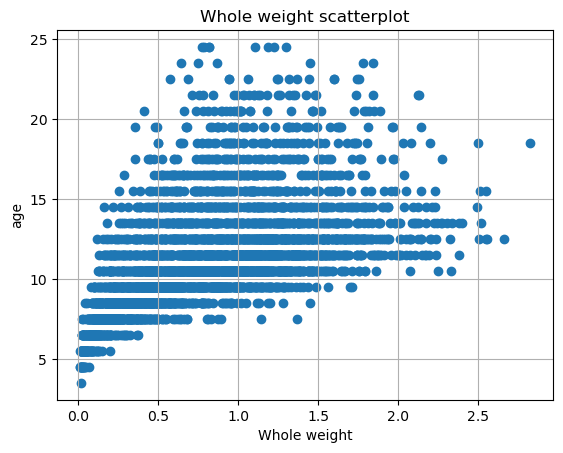

In [39]:
var='Whole weight'
plt.scatter(x=df[var],y=df['age'])
plt.xlabel(var)
plt.ylabel('age')
plt.title(var+' scatterplot')
plt.grid(True)
plt.show()

In [40]:
df.drop(df[(df['Whole weight']>2.1)& (df['age']>18) ].index,inplace=True)


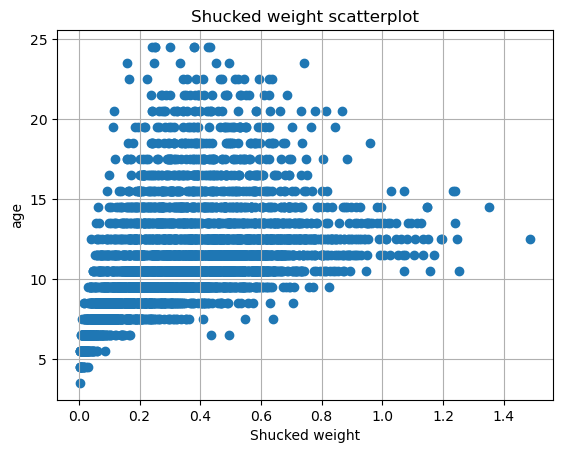

In [41]:
var='Shucked weight'
plt.scatter(x=df[var],y=df['age'])
plt.xlabel(var)
plt.ylabel('age')
plt.title(var+' scatterplot')
plt.grid(True)
plt.show()

In [42]:
df.drop(df[(df['Shucked weight']>0.81) & (df['age']<20)].index,inplace=True)

In [43]:
df.drop(df[(df['Shucked weight']>1.0) ].index,inplace=True)
df.drop(df[(df['Shucked weight']>0.9) & (df['age']>18)].index,inplace=True)
df.drop(df[(df['Shucked weight']>0.6) & (df['age']>23)].index,inplace=True)

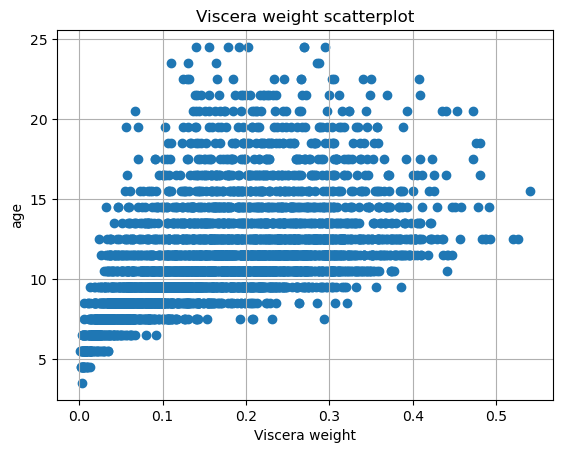

In [44]:
var='Viscera weight'
plt.scatter(x=df[var],y=df['age'])
plt.xlabel(var)
plt.ylabel('age')
plt.title(var+' scatterplot')
plt.grid(True)
plt.show()

In [45]:
df.drop(df[(df['Viscera weight']>0.42) & (df['age']>20)].index,inplace=True)

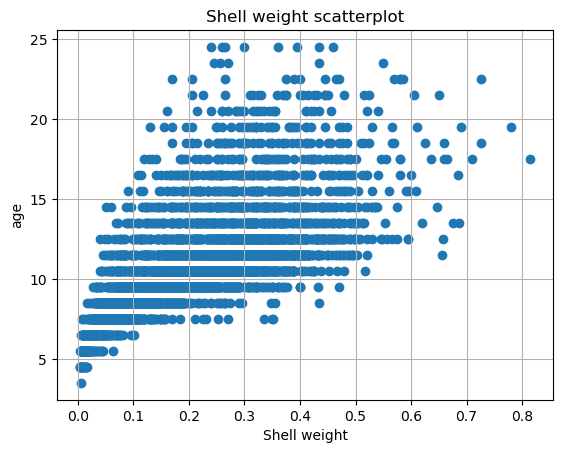

In [46]:
var='Shell weight'
plt.scatter(x=df[var],y=df['age'])
plt.xlabel(var)
plt.ylabel('age')
plt.title(var+' scatterplot')
plt.grid(True)
plt.show()

In [47]:
df.drop(df[(df['Shell weight']>0.63) ].index,inplace=True)

# var='age'
plt.scatter(x=df[var],y=df['age'])
plt.xlabel(var)
plt.ylabel('age')
plt.title(var+' scatterplot')
plt.grid(True)
plt.show()

In [54]:
df.shape 

(4005, 11)

In [55]:
data.shape

(4177, 9)

# pre processing


In [56]:
x=df.drop('age',axis=1)
y=df['age']

In [57]:
standardscale =StandardScaler()
standardscale.fit_transform(x)

array([[-0.52935516, -0.38208102, -1.12913545, ..., -0.66771878,
        -0.70909397,  1.34190138],
       [-1.43501669, -1.42408471, -1.26474548, ..., -0.66771878,
        -0.70909397,  1.34190138],
       [ 0.11754594,  0.191021  , -0.04425526, ...,  1.49763646,
        -0.70909397, -0.74521125],
       ...,
       [ 0.63506682,  0.39942174, -0.04425526, ..., -0.66771878,
        -0.70909397,  1.34190138],
       [ 0.7213203 ,  0.76412302,  1.85428508, ..., -0.66771878,
        -0.70909397,  1.34190138],
       [ 0.93695399,  0.86832339,  0.36257482, ...,  1.49763646,
        -0.70909397, -0.74521125]])

In [58]:
skb = SelectKBest()
x_new = skb.fit_transform(x,y)

In [61]:
x_train, x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.3,random_state = 25)


# MOdelling

In [70]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print('rmse',mean_squared_error(y_test,predlr))
print('r2score',r2_score(y_test,predlr))

rmse 4.5392752929886875
r2score 0.528092783679561


In [71]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
predknr = knr.predict(x_test)
print('rmse',mean_squared_error(y_test,predknr))
print('r2score',r2_score(y_test,predknr))

rmse 4.939700499168054
r2score 0.4864642125540085


In [72]:
Rfr = RandomForestRegressor()
Rfr.fit(x_train,y_train)
predRfr = Rfr.predict(x_test)
print('rmse',mean_squared_error(y_test,predRfr))
print('r2score',r2_score(y_test,predRfr))

rmse 4.523746339434277
r2score 0.5297071879117852


In [75]:
Gbr = GradientBoostingRegressor()
Gbr.fit(x_train,y_train)
predGbr = Gbr.predict(x_test)
print('rmse',mean_squared_error(y_test,predGbr))
print('r2score',r2_score(y_test,predGbr))

rmse 4.4148304710273685
r2score 0.5410301813315533


In [76]:
rigi = Ridge()
rigi.fit(x_train,y_train)
predrigi = rigi.predict(x_test)
print('rmse',mean_squared_error(y_test,predrigi))
print('r2score',r2_score(y_test,predrigi))

rmse 4.574496840077043
r2score 0.5244311193899688


In [77]:
sv = SVR()
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
print('rmse',mean_squared_error(y_test,predsv))
print('r2score',r2_score(y_test,predsv))

rmse 5.024791265888156
r2score 0.4776180985235424


In [78]:
def rmse_cv(model,x_train,y):
    rmse=-(cross_val_score(model,x_train,y,scoring='neg_mean_squared_error',cv=5))
    return rmse*100
models=[LinearRegression(),
       Ridge(),
       RandomForestRegressor(),
       GradientBoostingRegressor(),
       SVR(),
       KNeighborsRegressor(n_neighbors=4)]
names=['lr','ridge','rf','gbg','svn','knn']

for model,name in zip(models,names):
    score=rmse_cv(model,x_train,y_train)
    print('{}  :{:.6f},{:4f}'.format(name,score.mean(),score.std()))
    


lr  :447.116584,35.421478
ridge  :456.905931,36.291633
rf  :461.708932,47.032708
gbg  :454.150205,52.954076
svn  :513.162695,58.382572
knn  :510.251110,59.129340


In [79]:
from sklearn.model_selection import GridSearchCV
param={'alpha':[0.01,0.1,1,10,100],
      'solver':['auto','svd','chloesky','lsqr','spare_cg','saga','sag']}
glrm=GridSearchCV(estimator=Ridge(random_state=25),param_grid=param,scoring='r2',cv=3,n_jobs=-1)
glrm.fit(x_train,y_train)
glrm.best_params_,glrm.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1011, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 782, in fit
    self.coef_, self.n_iter_ = _ridge_regression

({'alpha': 0.01, 'solver': 'saga'}, 0.5467736327274082)